**Handwritten Digit Recognition**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.drop(["label"],axis = 1).values
Y = train["label"].values

<Axes: ylabel='count'>

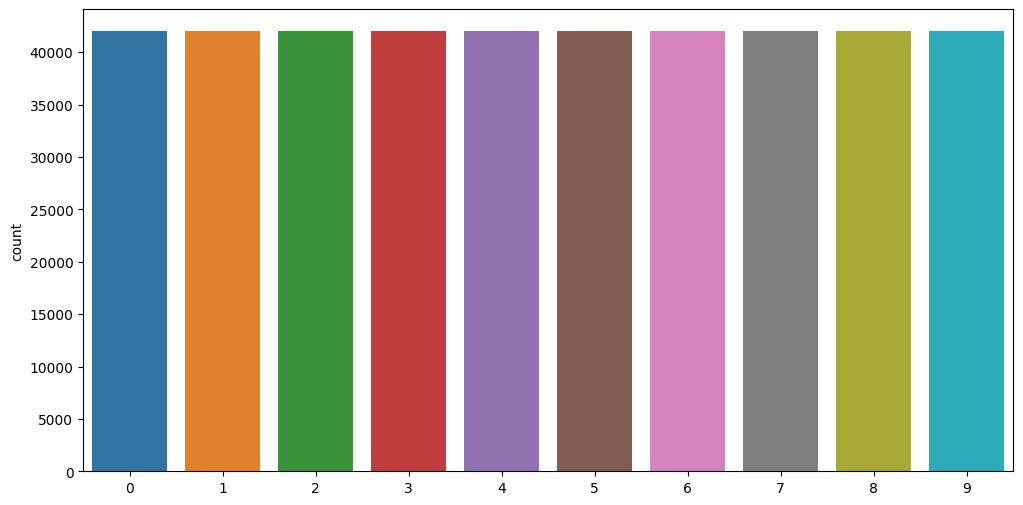

In [ ]:

plt.figure(figsize = (12,6))
sb.countplot(Y)

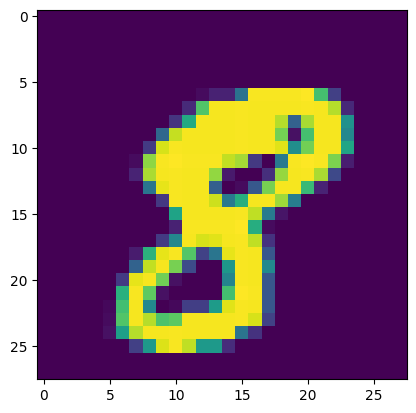

In [ ]:
plt.imshow(X[10].reshape([28,28]))

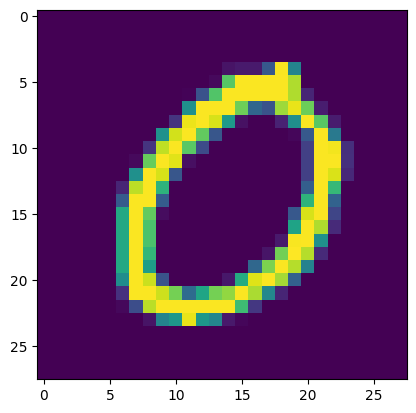

In [ ]:
plt.imshow(X[1455].reshape([28,28]))

In [ ]:
X = X.reshape([42000,28,28,1])
Y = Y.reshape([42000,1])

In [ ]:
from keras.utils.np_utils import to_categorical 
Y = to_categorical(Y, num_classes = 10)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 14)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


In [ ]:
x_train = x_train/255
x_test = x_test/255

CNN Architecture

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
batch_size = 64
epochs = 30   

In [ ]:
train_datagen = ImageDataGenerator( 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        shear_range = 0.1,
        horizontal_flip=False,  
        vertical_flip=False
        )
train_datagen.fit(x_train)

In [ ]:
history = model.fit(
            train_datagen.flow(x_train,y_train,batch_size = batch_size),
            validation_data = (x_test,y_test),
            batch_size = batch_size,
            steps_per_epoch = 100,
            epochs = epochs,
            verbose = 1
             )

Epoch 1/30
100/100 [==============================] - 27s 257ms/step - loss: 1.7303 - accuracy: 0.3739 - val_loss: 0.4113 - val_accuracy: 0.8843
Epoch 2/30
100/100 [==============================] - 25s 255ms/step - loss: 0.6161 - accuracy: 0.8058 - val_loss: 0.1849 - val_accuracy: 0.9414
Epoch 3/30
100/100 [==============================] - 25s 252ms/step - loss: 0.3935 - accuracy: 0.8783 - val_loss: 0.1360 - val_accuracy: 0.9600
Epoch 4/30
100/100 [==============================] - 25s 253ms/step - loss: 0.3026 - accuracy: 0.9077 - val_loss: 0.1039 - val_accuracy: 0.9674
Epoch 5/30
100/100 [==============================] - 25s 254ms/step - loss: 0.2439 - accuracy: 0.9273 - val_loss: 0.1209 - val_accuracy: 0.9638
Epoch 6/30
100/100 [==============================] - 27s 267ms/step - loss: 0.2146 - accuracy: 0.9337 - val_loss: 0.0706 - val_accuracy: 0.9769
Epoch 7/30
100/100 [==============================] - 25s 254ms/step - loss: 0.2018 - accuracy: 0.9388 - val_loss: 0.0849 - val_ac

**Train Accuracy : 97%**
**Test Accuracy : 98%**

In [ ]:
model.evaluate(x_test,y_test)    

132/132 [==============================] - 3s 21ms/step - loss: 0.0330 - accuracy: 0.9890


[0.03303157538175583, 0.989047646522522]

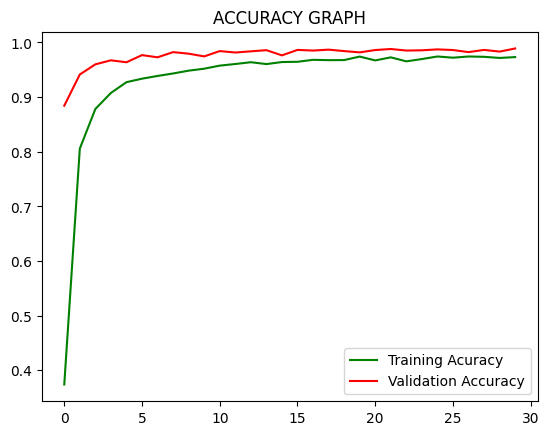

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.title('ACCURACY GRAPH')
plt.legend()
     

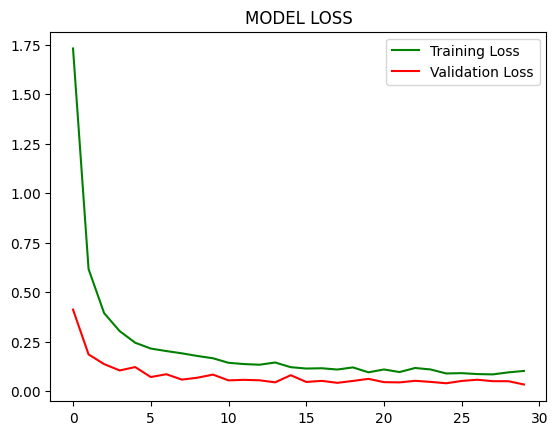

In [ ]:
plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.title("MODEL LOSS")
plt.legend()

Comparing Model 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Initialize the KNN and Decision Tree classifiers
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()

# Train the KNN classifier
knn.fit(X_train, y_train)

# Train the Decision Tree classifier
tree.fit(X_train, y_train)

# Predict the test data using both classifiers
y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

# Calculate the accuracy of both classifiers
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print the accuracy of both classifiers
print("KNN Accuracy:", accuracy_knn)
print("Decision Tree Accuracy:", accuracy_tree)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KNN Accuracy: 0.9700714285714286
Decision Tree Accuracy: 0.8733571428571428
